In [3]:
#importing necessary libraries
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file('jeevananne', 'TCD6Eh007t3THmyiOo8b')
py.sign_in('jeevananne', 'TCD6Eh007t3THmyiOo8b')
import numpy as np
import warnings
from collections import defaultdict
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import brown
import matplotlib.pyplot as plt
import nltk
from matplotlib import rcParams
import math
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeevananand.anne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#import data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (1306122, 3)
Test shape :  (56370, 2)


In [5]:
#display top 5 rows
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
#structure of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [7]:
test_df.head()

,qid,question_text
0,00014894849d00ba98a9,My voice range is A2-C5. My chest voice goes u...
1,000156468431f09b3cae,How much does a tutor earn in Bangalore?
2,000227734433360e1aae,What are the best made pocket knives under $20...
3,0005e06fbe3045bd2a92,Why would they add a hypothetical scenario tha...
4,00068a0f7f41f50fc399,What is the dresscode for Techmahindra freshers?


## Data Exploration

#### What is the class distribution?

In [8]:
class_dist = train_df['target'].value_counts()
labels = (np.array(class_dist.index))
sizes = (np.array((class_dist / class_dist.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Class Distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jeevananne/0 or inside your plot.ly account where it is named 'usertype'


From the plot, we can say that there are almost 93.8% of quora questions are sincere (target=0) and 6.2% of quora questions are insincere (target=1)

#### What are the most frequent words in both of the classes?

In [9]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

#### For Sincere:

In [10]:
sincere_df = train_df[train_df['target']==0]

##### Unigram

In [11]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in sincere_df["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

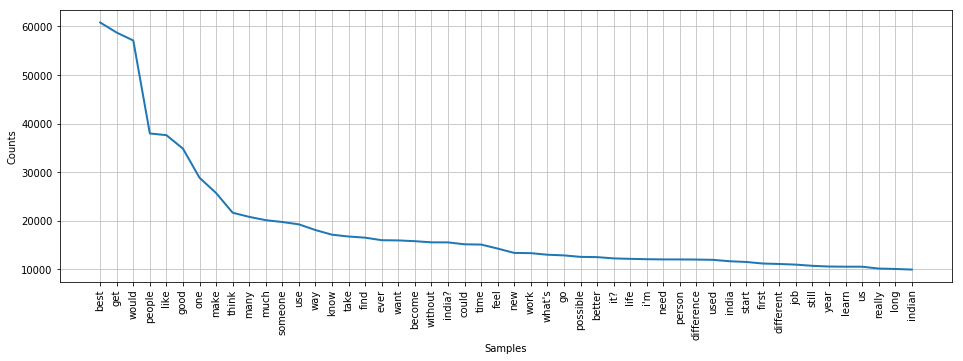

In [12]:
freqdist = nltk.FreqDist(freq_dict)
plt.figure(figsize=(16,5))
freqdist.plot(50)

##### Bigram

In [13]:
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in sincere_df["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1

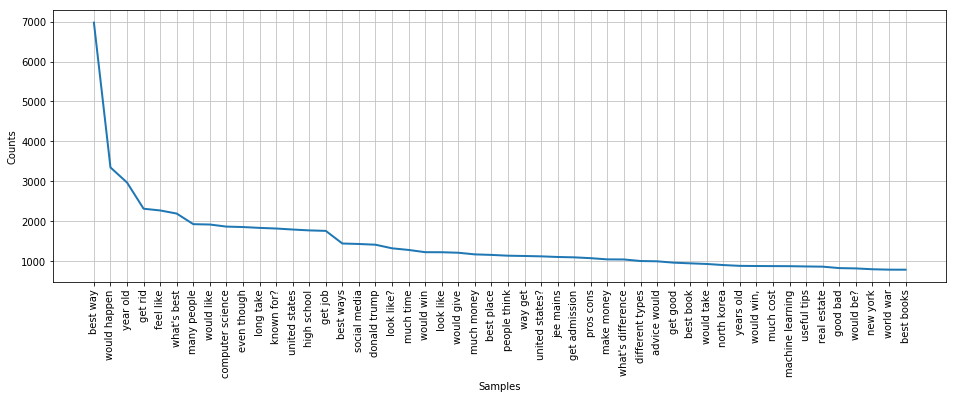

In [14]:
freqdist = nltk.FreqDist(freq_dict)
plt.figure(figsize=(16,5))
freqdist.plot(50)

#### For Insincere Questions:

In [15]:
insincere_df = train_df[train_df['target']==1]

##### Unigram

In [16]:
# Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in insincere_df["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1

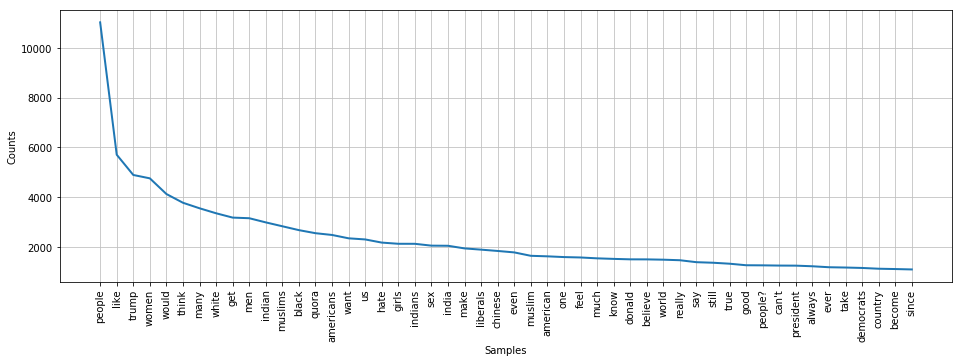

In [17]:
freqdist = nltk.FreqDist(freq_dict)
plt.figure(figsize=(16,5))
freqdist.plot(50)

##### Bigram

In [18]:
# Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in insincere_df["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1

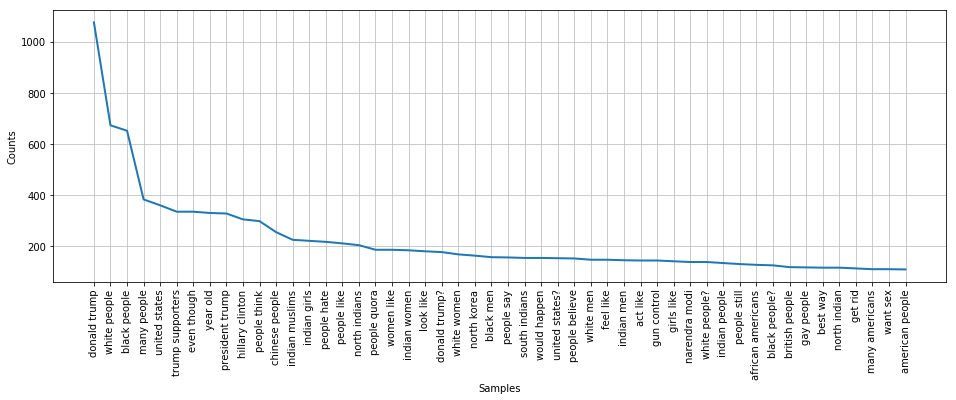

In [19]:
freqdist = nltk.FreqDist(freq_dict)
plt.figure(figsize=(16,5))
freqdist.plot(50)

#### What is the word distribution across the questions?


In [18]:
import plotly.tools as tls


In [19]:
#Number of words in the text
train_df["words#"] = train_df["question_text"].apply(lambda x: len(str(x).split()))


In [20]:
test_df["words#"] = test_df["question_text"].apply(lambda x: len(str(x).split()))

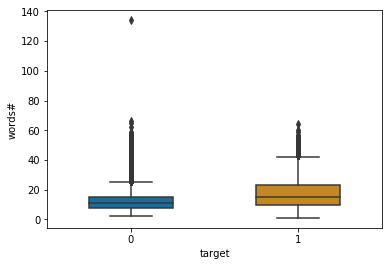

In [21]:
bplot = sns.boxplot(y='words#', x='target', 
                 data=train_df, 
                 width=0.5,
                 palette="colorblind")

#### What is the unique word distribution across the questions?

In [22]:
#Number of unique words in the text
train_df["unique_words#"] = train_df["question_text"].apply(lambda x: len(set(str(x).split())))

In [23]:
test_df["unique_words#"] = test_df["question_text"].apply(lambda x: len(str(x).split()))

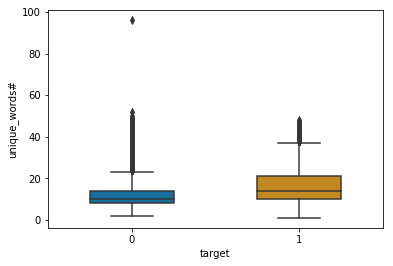

In [24]:
bplot = sns.boxplot(y='unique_words#', x='target', 
                 data=train_df, 
                 width=0.5,
                 palette="colorblind")

## Building Models

In [20]:
#scikit-learn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import re
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

#### Baseline model

In [32]:
X = train_df[['question_text', 'words#','unique_words#']]
Y = train_df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]


In [34]:
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [37]:
from sklearn.preprocessing import FunctionTransformer
get_numeric_data = FunctionTransformer(lambda x: x[['words#','unique_words#']], validate=False)

classifier = Pipeline([
    ('features', FeatureUnion([
        ('text_features', Pipeline([
            ('colext', TextSelector('question_text')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            #('svd', TruncatedSVD(algorithm='randomized', n_components=300)), #for XGB
        ])),
        ('numerical_features', Pipeline([
            ('wordext', get_numeric_data),
            ('wscaler', StandardScaler()),
        ])),
        
    ])),
  #  ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)),
#    ('clf', RandomForestClassifier()),
  ('clf', LogisticRegression(C=5., solver='sag')),
    ])

In [38]:
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Accuracy: 0.9448873154463129
Precision: 0.6356379380327425
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    306530
           1       0.64      0.23      0.34     20001

   micro avg       0.94      0.94      0.94    326531
   macro avg       0.79      0.61      0.66    326531
weighted avg       0.93      0.94      0.93    326531

[[303837   2693]
 [ 15303   4698]]


In [ ]:
#submission = pd.DataFrame.from_dict({'qid': test_df['qid']})
#submission['prediction'] = preds
#submission.to_csv('submission.csv', index=False)

#### RandomForest

In [40]:
get_numeric_data = FunctionTransformer(lambda x: x[['words#','unique_words#']], validate=False)

classifier = Pipeline([
    ('features', FeatureUnion([
        ('text_features', Pipeline([
            ('colext', TextSelector('question_text')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            #('svd', TruncatedSVD(algorithm='randomized', n_components=300)), #for XGB
        ])),
        ('numerical_features', Pipeline([
            ('wordext', get_numeric_data),
            ('wscaler', StandardScaler()),
        ])),
        
    ])),
  #  ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)),
   ('clf', RandomForestClassifier()),
 # ('clf', LogisticRegression(C=5., solver='sag')),
    ])

In [41]:
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Accuracy: 0.9424036308956883
Precision: 0.5726454125091263
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    306530
           1       0.57      0.24      0.33     20001

   micro avg       0.94      0.94      0.94    326531
   macro avg       0.76      0.61      0.65    326531
weighted avg       0.93      0.94      0.93    326531

[[303018   3512]
 [ 15295   4706]]


In [ ]:
#submission = pd.DataFrame.from_dict({'qid': test_df['qid']})
#submission['prediction'] = preds
#submission.to_csv('submission.csv', index=False)

#### Improved logistic regression with cross validation

In [2]:
#scikit-learn
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

Using TensorFlow backend.


In [21]:
# building tf idf matrix
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
tfidf_vec.fit_transform(train_df['question_text'].values.tolist() + test_df['question_text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['question_text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['question_text'].values.tolist())

In [22]:
train_y = train_df["target"].values

def model(train_X, train_y, test_X, test_y, test_X2):
    """building a Logistic Regression model given train and test datasets"""
    model = linear_model.LogisticRegression(C=5., solver='sag')
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)[:,1]
    pred_test_y2 = model.predict_proba(test_X2)[:,1]
    return pred_test_y, pred_test_y2, model

print("Building model..")
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0]])
#k fold validation
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_df):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = model(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break

Building model..


#### Setting different levels of threshold for F1 score

In [23]:
for threshold in np.arange(0.1, 0.201, 0.01):
    threshold = np.round(threshold, 2)
    print("F1 score at threshold {0} is {1}".format(threshold, metrics.f1_score(val_y, (pred_val_y>threshold).astype(int))))

F1 score at threshold 0.1 is 0.5684940642923836
F1 score at threshold 0.11 is 0.5767330162102249
F1 score at threshold 0.12 is 0.5837098663606589
F1 score at threshold 0.13 is 0.5898637978681406
F1 score at threshold 0.14 is 0.593576234607084
F1 score at threshold 0.15 is 0.5955237896494157
F1 score at threshold 0.16 is 0.5971034630183839
F1 score at threshold 0.17 is 0.5972875423821503
F1 score at threshold 0.18 is 0.59652752537255
F1 score at threshold 0.19 is 0.5945699032175178
F1 score at threshold 0.2 is 0.5933791016988597


In [24]:
#interpreting the results for the predicted class
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [29]:
class_names = ['Sincere','Insincere']
explainer_quora = LimeTextExplainer(class_names=class_names)

In [35]:
from sklearn.pipeline import make_pipeline
classifier_quora = make_pipeline(tfidf_vec, model)

In [76]:
np.where(preds == 0)

(array([    0,     1,     2, ..., 56366, 56367, 56368]),)

In [71]:
np.where(preds == 1)

(array([  102,   117,   134, ..., 56330, 56342, 56369]),)

In [73]:
idx=117
exp = explainer_quora.explain_instance(test_df['question_text'][idx], classifier_quora.predict_proba, num_features=5)
exp.show_in_notebook(text=test_df['question_text'][idx])

In [81]:
idx=56368
exp = explainer_quora.explain_instance(test_df['question_text'][idx], classifier_quora.predict_proba, num_features=5)
exp.show_in_notebook(text=test_df['question_text'][idx])

In [45]:
exp.available_labels()

[0, 1]

In [67]:
preds = model.predict(test_tfidf)